# Contents:

I. [Outlier Treatment:](#Outlier-Treatment:)



III. [Feature Extraction:](#Feature-Extraction:)



IV. [Saving the final model ready data:](#Saving-the-final-model-ready-data:)

## Outlier Treatment:

([Contents:](#Contents:))

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
import seaborn as sns

import os
import time
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_excel('/content/gdrive/MyDrive/Project-Assignment/news_share_data.xlsx')

data.head(10)
data.shape
data.head(10)

,article_id,title,text,published_date,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,2014-03-31,0.640816,5,3,1,4.579592,5,Business,1459.500,4817.692,3370.415,1833.333,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,2014-04-01,0.549618,4,1,0,4.636704,7,Tech,0.000,3581.094,2556.367,8500.000,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,2014-04-01,0.577236,8,1,0,4.627451,7,Tech,2270.889,3852.800,3018.167,2076.333,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,2014-04-01,0.525896,4,1,0,5.083665,9,Tech,0.000,3581.094,1871.403,2200.000,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,2014-04-01,0.588889,6,9,0,4.336022,7,00000,3581.094,8453.451,5155.323,805.000,0.628535,0.078497,0.053763,0.034946,0.000000,0.000000,3000
5,7033985,Apple to Begin iPhone 6 Screen Production in M...,Whispers surrounding a possible iPhone 6 relea...,2014-04-01,0.494269,8,1,0,4.360679,4,Business,3343.790,4817.692,3974.216,31625.000,0.567866,0.098980,0.038190,0.024045,0.666667,-0.333330,1600
6,7014312,"Apple Updates iWork for OS X, iOS and iCloud","Apple updated its iWork suite Tuesday, adding ...",2014-04-01,0.639706,4,1,0,4.594444,7,Lifestyle,2499.333,5549.418,3667.217,4800.000,0.347222,0.186111,0.033333,0.005556,0.000000,0.000000,1300
7,3299703,Spare Your Facebook Friends From These 9 April...,Everybody's a comedian -- at least they think ...,2014-04-01,0.508511,26,8,0,4.713427,7,Tech,3030.861,4622.544,3761.262,3700.000,0.484539,0.134520,0.050100,0.026052,0.400000,-0.150000,2000
8,7014271,Why Tech Takes April Fools' Day So Seriously,Tech journalists hate April Fools' Day. Not be...,2014-04-01,0.481013,9,3,1,4.374613,8,Lifestyle,0.000,6813.466,3745.055,11800.000,0.533060,0.186324,0.046440,0.021672,0.066667,0.033333,2100
9,7008095,Atlanta Is World's Busiest Airport With 94 Mil...,Atlanta's Hartsfield-Jackson airport remained ...,2014-04-01,0.422028,11,1,0,4.272043,5,Business,3343.790,5585.617,4111.006,2600.000,0.502861,0.121931,0.043011,0.018280,0.357143,0.000000,1100


In [4]:
df = data.copy()

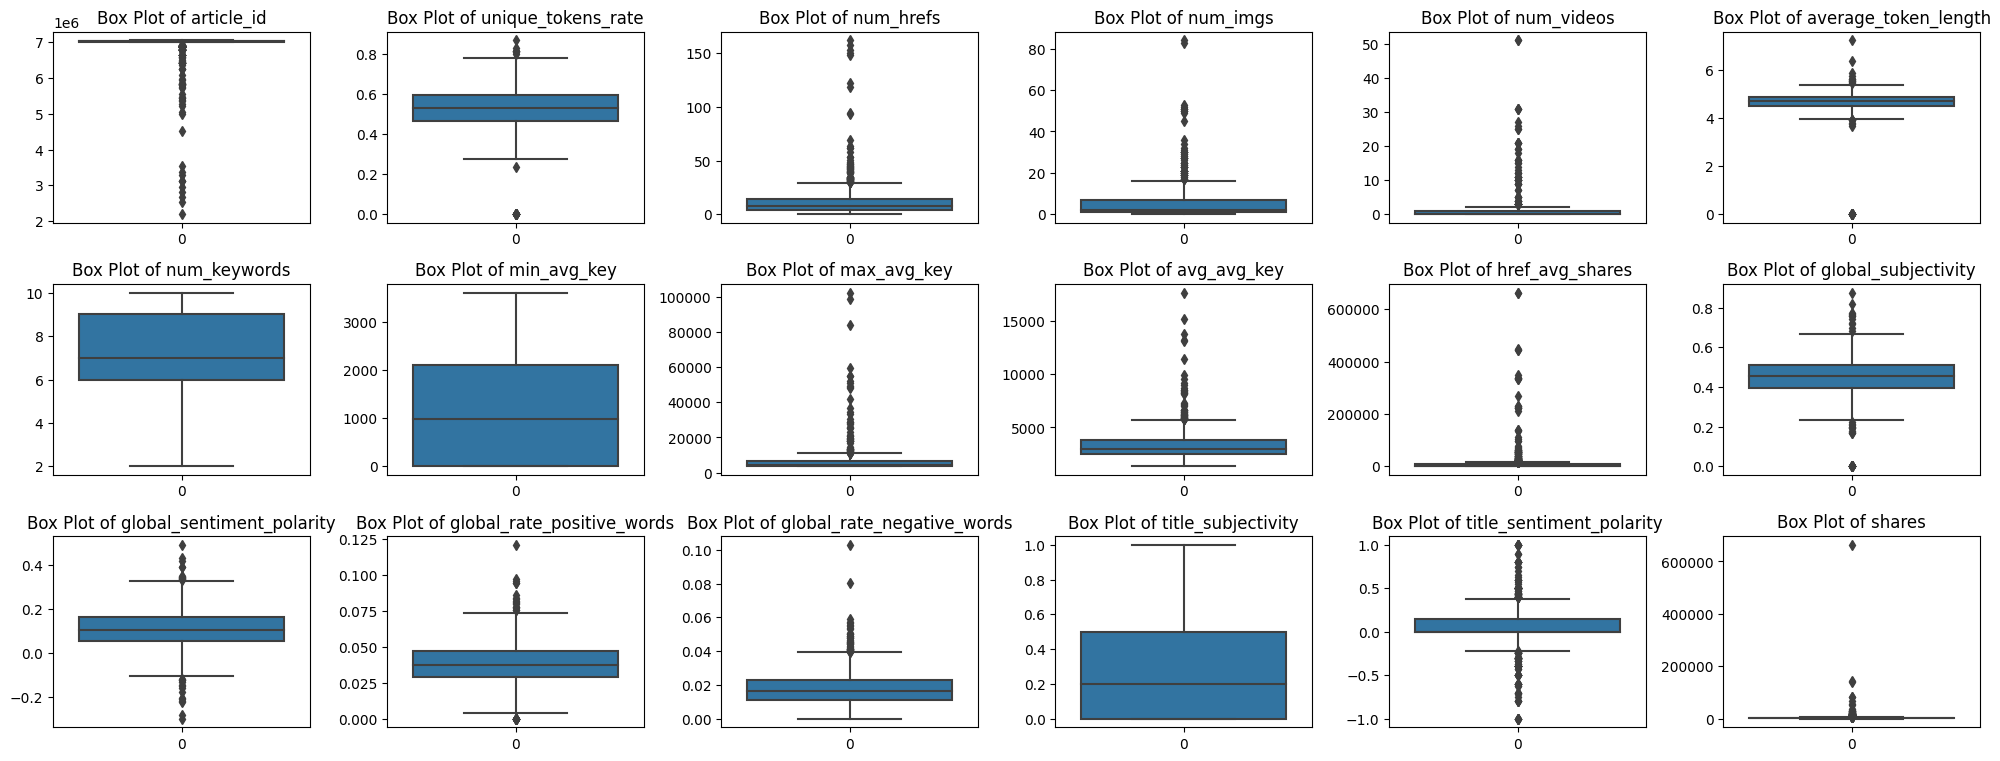

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
# box plot to see outlayer
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.boxplot(df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.tight_layout()

plt.show()

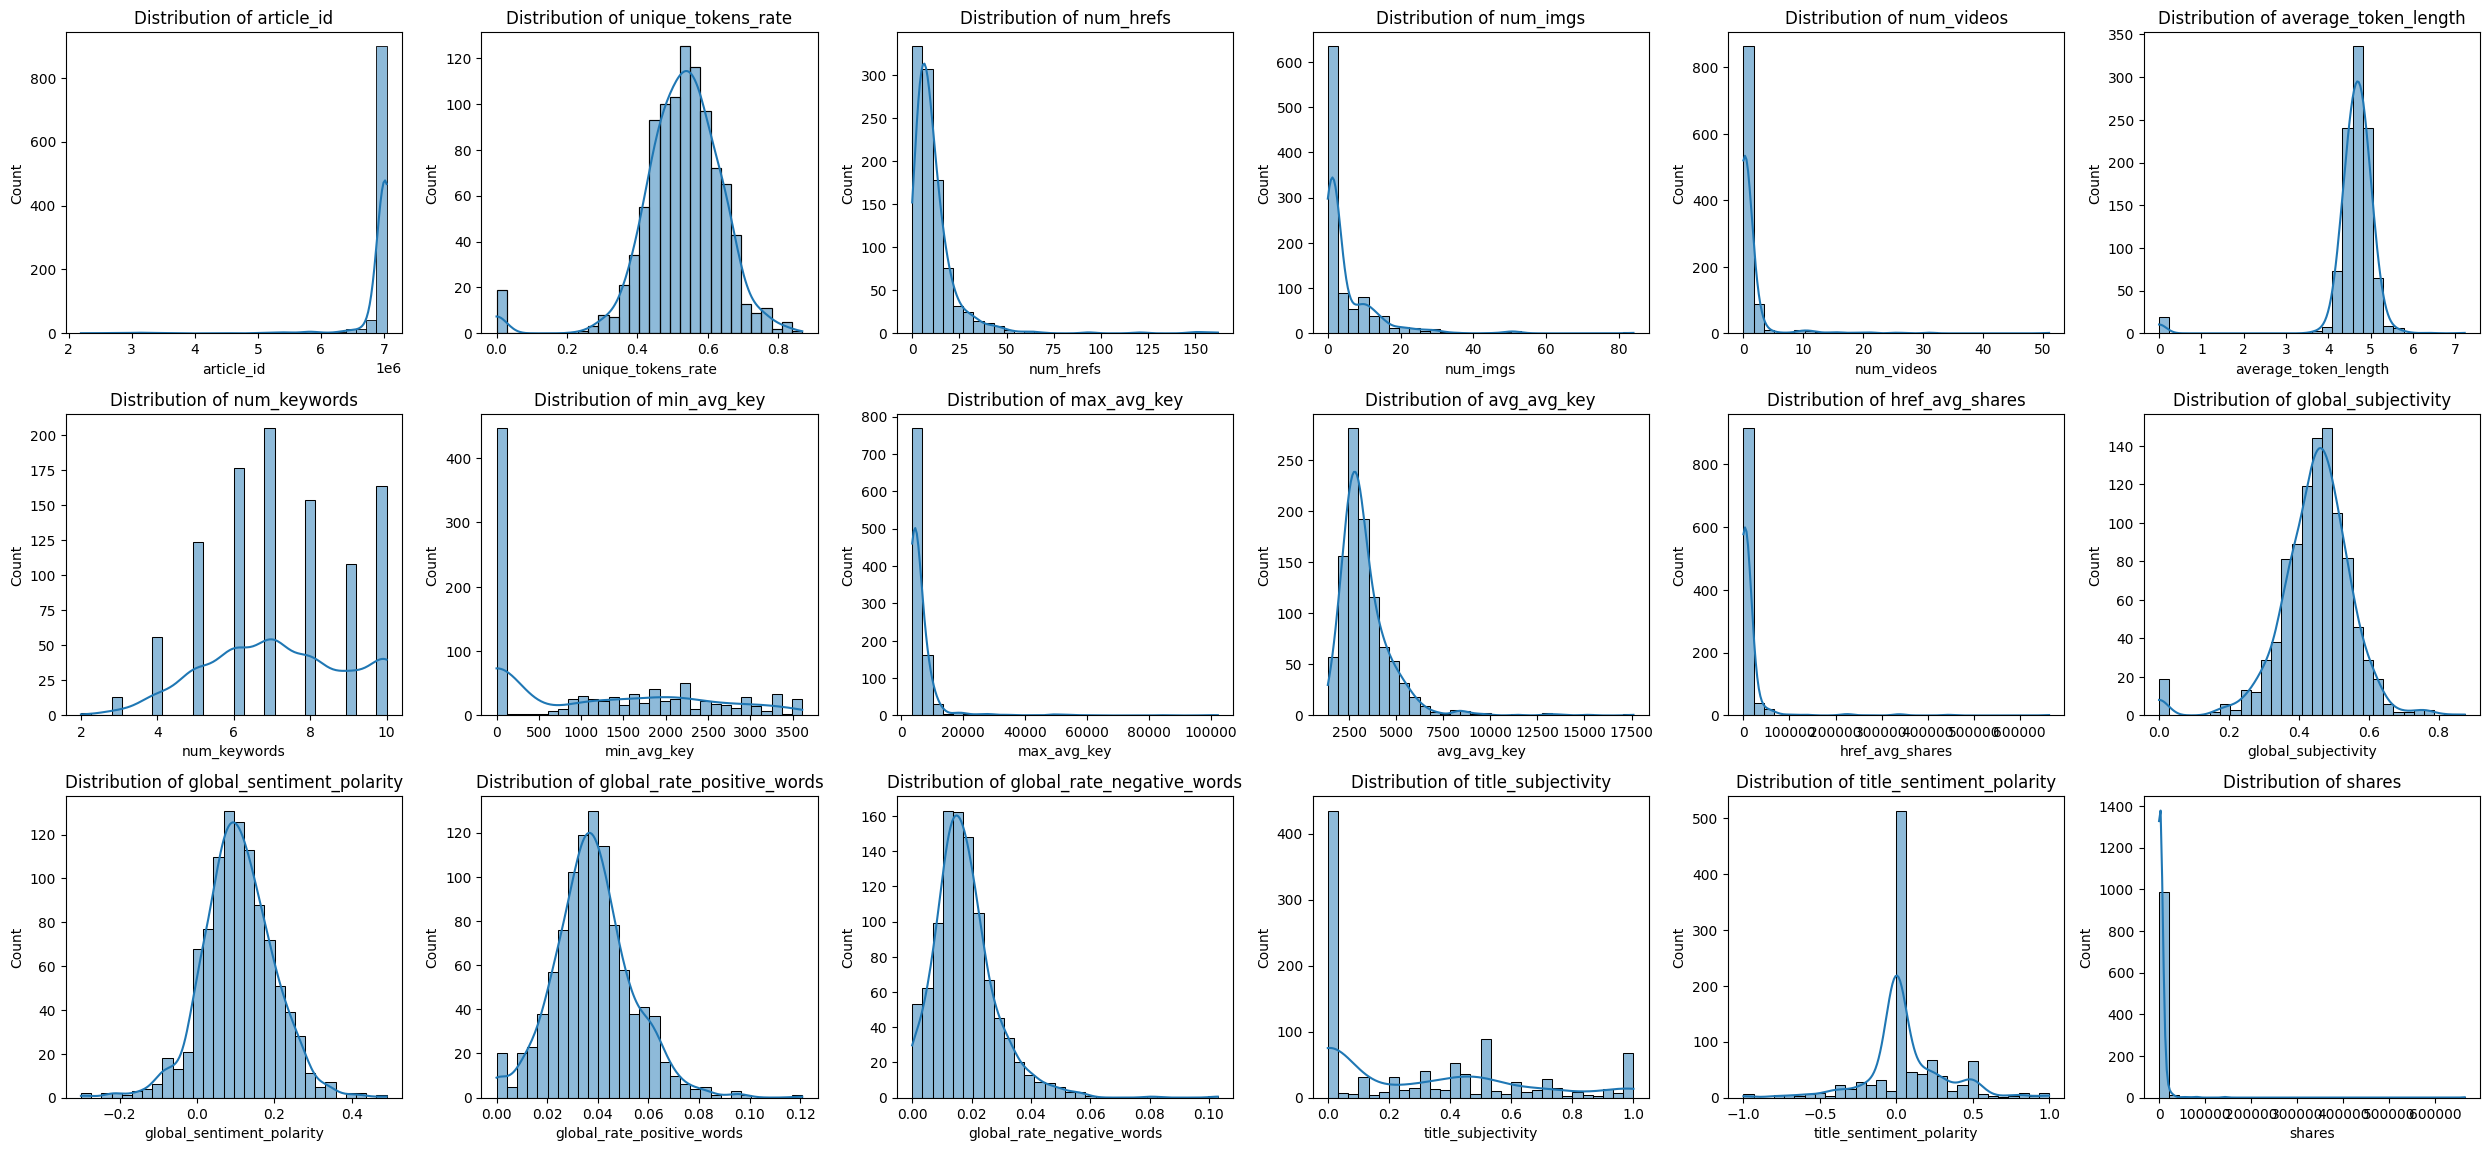

In [6]:
#distribution
plt.figure(figsize=(25, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

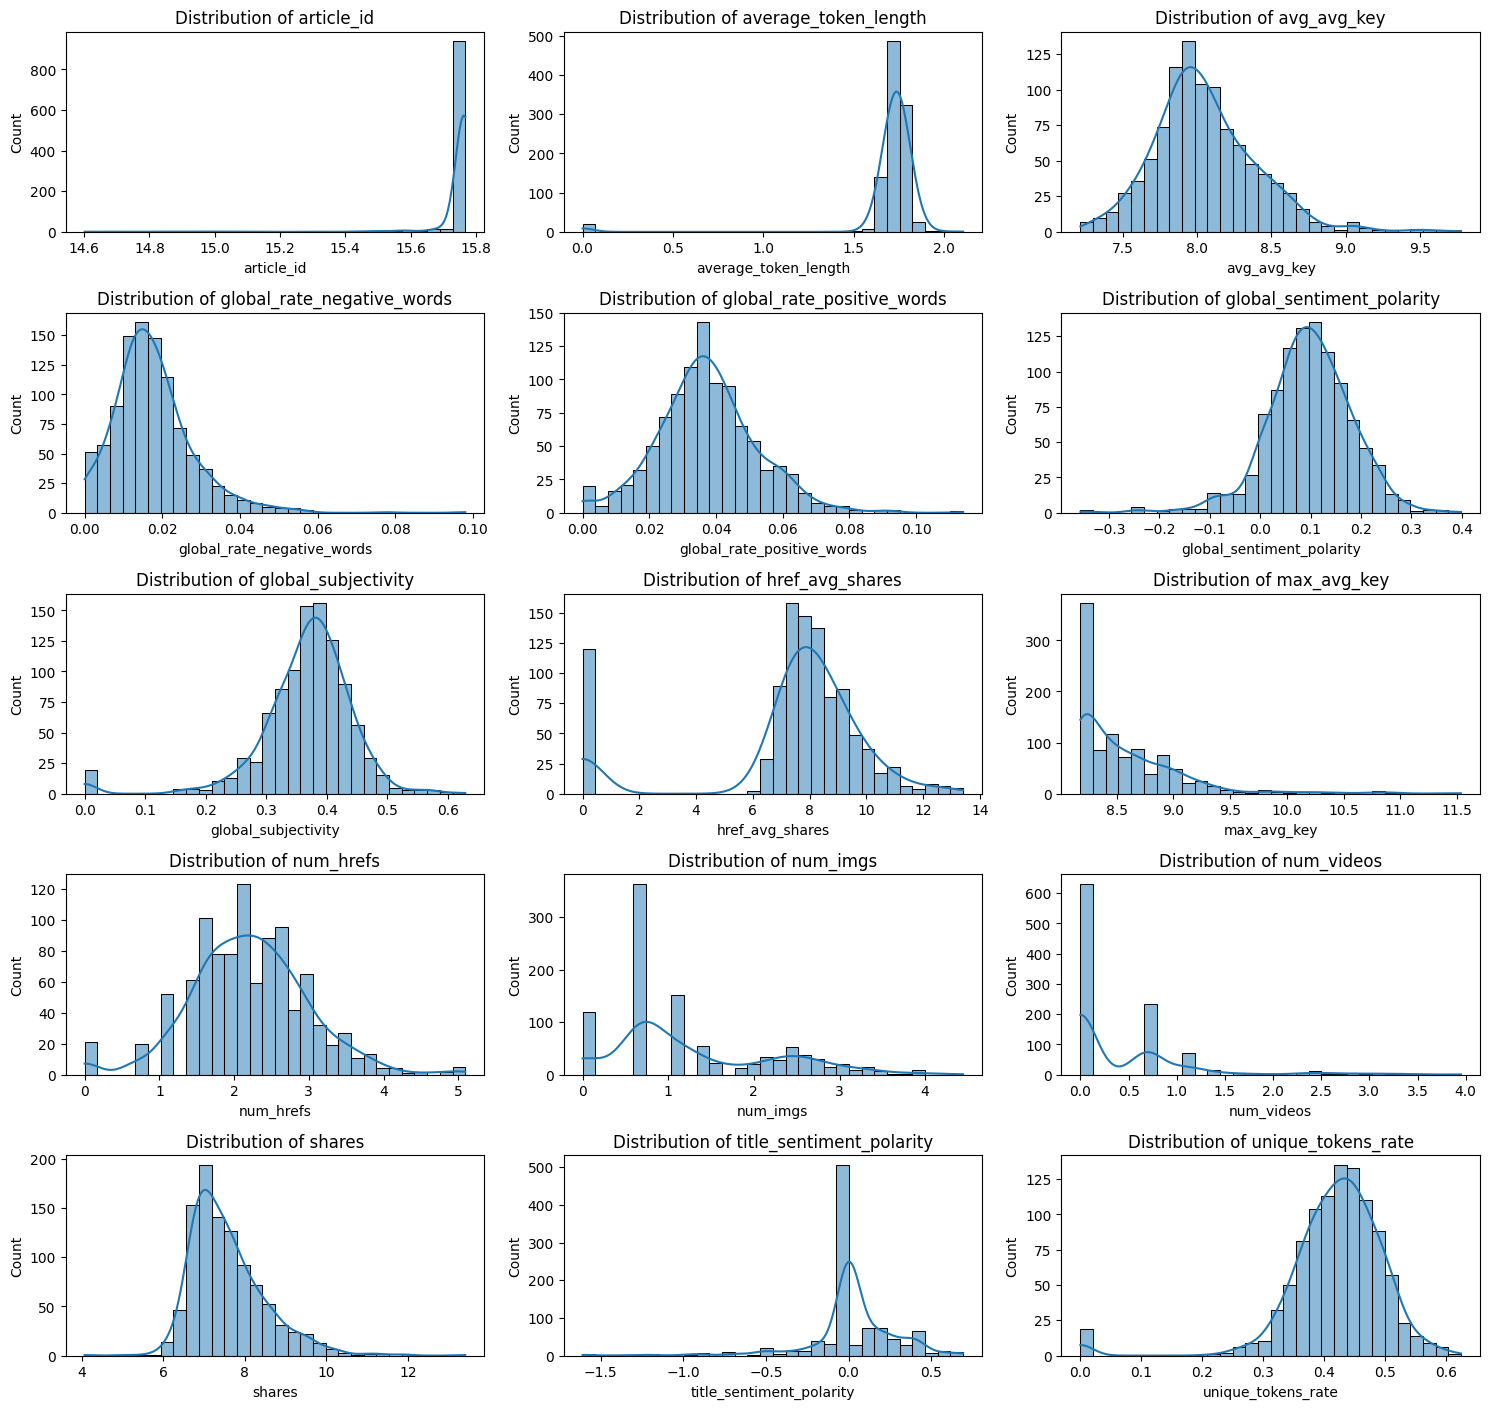

In [7]:
# treating outliers

import numpy as np

features_with_outliers = ['article_id', 'average_token_length', 'avg_avg_key', 'global_rate_negative_words',
                           'global_rate_positive_words', 'global_sentiment_polarity', 'global_subjectivity',
                           'href_avg_shares', 'max_avg_key', 'num_hrefs', 'num_imgs', 'num_videos', 'shares',
                           'title_sentiment_polarity', 'unique_tokens_rate']

#logarithm transformation
for feature in features_with_outliers:
    df[feature] = np.log1p(df[feature])
# histogram
plt.figure(figsize=(15, 25))

for i, feature in enumerate(features_with_outliers, 1):
    plt.subplot(9,3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

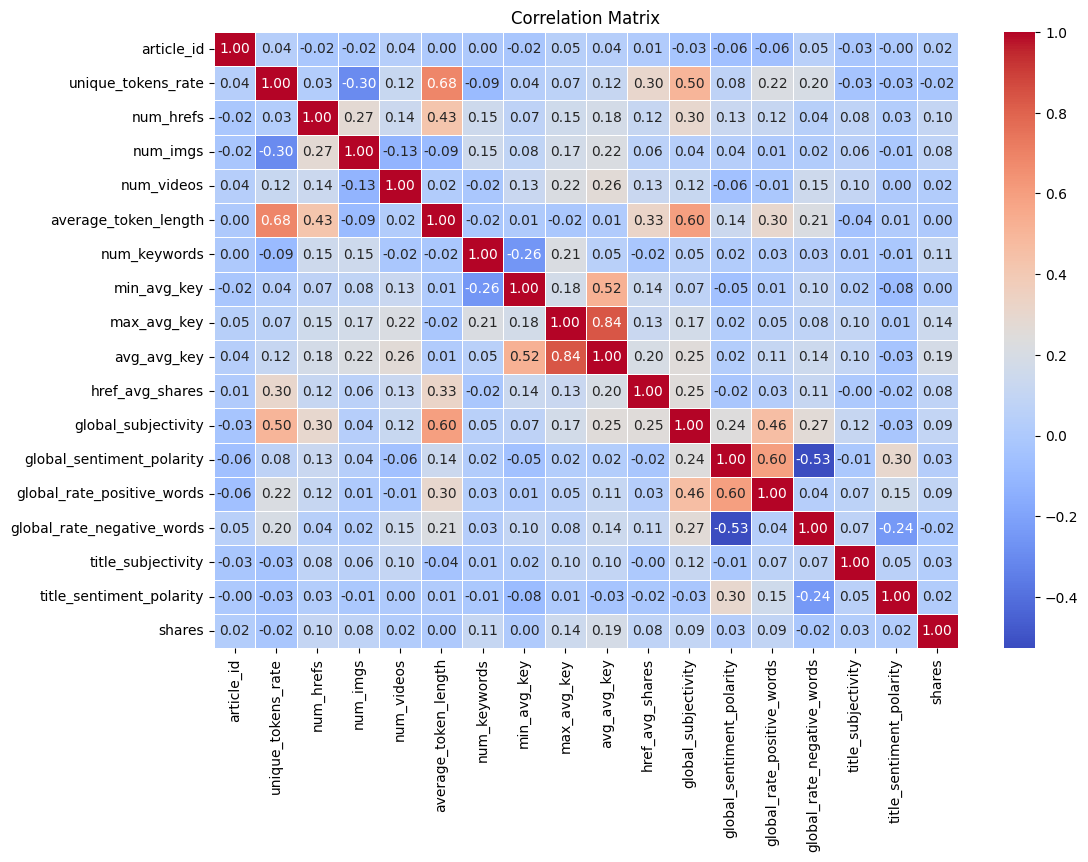

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# one-hot encoding for title column
title_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
title_encoded = title_vectorizer.fit_transform(df['title']).toarray()

# Eone-hot encoding for text column
text_vectorizer = CountVectorizer(max_features=1000, stop_words='english')
text_encoded = text_vectorizer.fit_transform(df['text']).toarray()

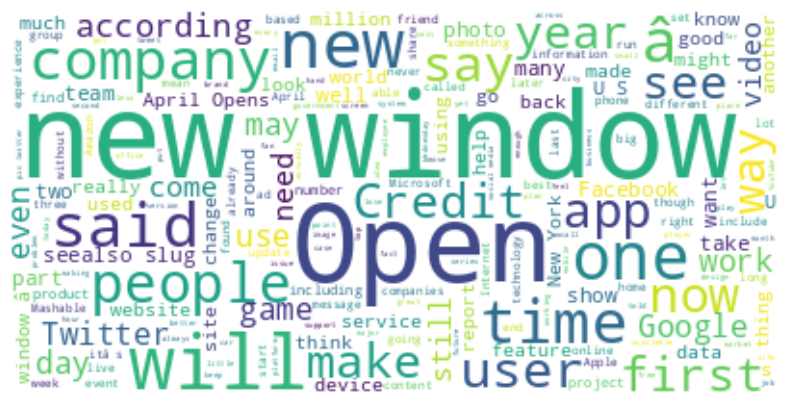

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating a word cloud
text = " ".join(article for article in df.text)
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [11]:

df['published_date'] = pd.to_datetime(df['published_date'])
df['month'] = df['published_date'].dt.month
df['day_of_week'] = df['published_date'].dt.dayofweek

df[['published_date', 'month', 'day_of_week']].head()

,published_date,month,day_of_week
0,2014-03-31,3,0
1,2014-04-01,4,1
2,2014-04-01,4,1
3,2014-04-01,4,1
4,2014-04-01,4,1


In [12]:
# Save the modified DataFrame to a different CSV file
new_file_path = '/content/gdrive/MyDrive/Project-Assignment/modified_file.csv'
df.to_csv(new_file_path, index=False)